In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [ ]:
BATCH_SIZE = 32
## transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

## download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



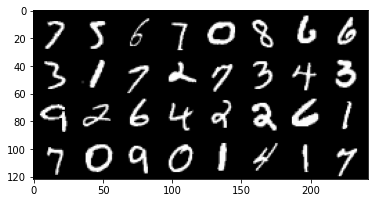

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
labels

tensor([7, 5, 6, 7, 0, 8, 6, 6, 3, 1, 7, 2, 7, 3, 4, 3, 9, 2, 6, 4, 2, 2, 6, 1,
        7, 0, 9, 0, 1, 4, 1, 7])

In [ ]:

'''
new_height = new_width = (W — F + 1) / S 

in this case 
w = 28 原本的寬
f = filter_size = in putorch = kernel_size
stride 是步伐


(28 - 3)+1 / 2
'''
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=4)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=3, kernel_size=3)
        self.conv3 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=2)

        self.d1 = nn.Linear(22 * 22, 128)
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # 32x1x28x28 => 32x4x25x25
        x = self.conv1(x)
        x = F.relu(x)

        # 32x4x25x25 => 32x3x23x23

        x = self.conv2(x)
        x = F.relu(x)

        # 32x3x23x23 =>32*3*22*22
        x = self.conv3(x)
        

        # flatten => 32 x (32*26*26)
        x = x.flatten(start_dim = 1)
        print(x.shape)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)

        # logits => 32x10
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out

In [ ]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


In [ ]:
## test the model with 1 batch
model = MyModel()
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    print(out)
    break

batch size: torch.Size([32, 1, 28, 28])
torch.Size([32, 484])
torch.Size([32, 10])
tensor([[0.0963, 0.0967, 0.0940, 0.1004, 0.0980, 0.1116, 0.1051, 0.1089, 0.0957,
         0.0935],
        [0.0964, 0.0963, 0.0934, 0.1007, 0.0980, 0.1124, 0.1046, 0.1087, 0.0958,
         0.0937],
        [0.0961, 0.0973, 0.0935, 0.1007, 0.0983, 0.1120, 0.1046, 0.1087, 0.0953,
         0.0936],
        [0.0962, 0.0969, 0.0935, 0.1006, 0.0984, 0.1117, 0.1049, 0.1086, 0.0957,
         0.0934],
        [0.0960, 0.0967, 0.0939, 0.1007, 0.0979, 0.1119, 0.1050, 0.1088, 0.0957,
         0.0933],
        [0.0961, 0.0970, 0.0931, 0.1004, 0.0981, 0.1117, 0.1053, 0.1089, 0.0957,
         0.0937],
        [0.0965, 0.0967, 0.0936, 0.1001, 0.0983, 0.1116, 0.1052, 0.1080, 0.0960,
         0.0940],
        [0.0959, 0.0964, 0.0942, 0.1005, 0.0984, 0.1117, 0.1051, 0.1090, 0.0956,
         0.0931],
        [0.0961, 0.0968, 0.0928, 0.1008, 0.0977, 0.1117, 0.1061, 0.1087, 0.0960,
         0.0933],
        [0.0962, 0.0964, 0

In [ ]:
learning_rate = 0.001
num_epochs = 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))        

Epoch: 0 | Loss: 1.8073 | Train Accuracy: 65.37
Epoch: 1 | Loss: 1.6602 | Train Accuracy: 80.25


In [ ]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
    print(labels)
        
print('Test Accuracy: %.2f'%( test_acc/i))

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1])
tensor([3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 8, 9, 3])
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4])
tensor([1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5])
tensor([8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9,
        5, 5, 1, 5, 6, 0, 3, 4])
tensor([4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0,
        8, 9, 2, 5, 0, 1, 1, 1])
tensor([0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0,
        3, 6, 5, 5, 7, 2, 2, 7])
tensor([1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4,
        4, 2, 4, 1, 9, 5, 7, 7])
tensor([2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1,
        2, 9, 7,

In [ ]:
30709/283


108.51236749116607